# Caderno base para análise e pré-processamento do Dataset

# Infopreço dos preços de Combustível no Brasil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt

In [3]:
infopreco_df = pd.read_csv('infopreco.csv', sep=';')
infopreco_df

,CNPJ,NOME,ENDEREÇO,COMPLEMENTO,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO
0,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Gasolina C Comum,"4,436",28/06/2018 17:49
1,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Etanol,"3,482",28/06/2018 17:49
2,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S500,"3,644",28/06/2018 17:49
3,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S10,"3,734",28/06/2018 17:49
4,300357000195,POSTO E TRANSPORTADORA PEGORARO,"RODOVIA BR 163,S/N",KM 786,ZONA RURAL,COXIM,MS,Gasolina C Comum,"4,349",09/12/2018 19:06
...,...,...,...,...,...,...,...,...,...,...
988,93777456000143,POSTO PAMPEANO II,"AVENIDA PRESIDENTE KENNEDY,185",NaN,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S500,"3,327",29/06/2018 12:01
989,93777456000143,POSTO PAMPEANO II,"AVENIDA PRESIDENTE KENNEDY,185",NaN,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S10,"3,394",29/06/2018 12:01
990,98749864000105,FIGUEIRA CENTRO COMERCIO E DERIVADOS DE COMBUS...,"RUA BENTO GONCALVES,1295",NaN,CENTRO,VIAMAO,RS,Gasolina C Comum,"4,399",14/10/2019 16:52
991,98749864000105,FIGUEIRA CENTRO COMERCIO E DERIVADOS DE COMBUS...,"RUA BENTO GONCALVES,1295",NaN,CENTRO,VIAMAO,RS,Diesel S500,"3,4",14/10/2019 16:52


Será que o CNPJ e o nome do posto são realmente importantes para nossa predição acerca do valor do combustível?
Acho que não, então iremos retirá-los do dataset

In [4]:
infopreco_df.drop(['CNPJ', 'NOME'], inplace=True, axis=1)
infopreco_df

,ENDEREÇO,COMPLEMENTO,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO
0,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Gasolina C Comum,"4,436",28/06/2018 17:49
1,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Etanol,"3,482",28/06/2018 17:49
2,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S500,"3,644",28/06/2018 17:49
3,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S10,"3,734",28/06/2018 17:49
4,"RODOVIA BR 163,S/N",KM 786,ZONA RURAL,COXIM,MS,Gasolina C Comum,"4,349",09/12/2018 19:06
...,...,...,...,...,...,...,...,...
988,"AVENIDA PRESIDENTE KENNEDY,185",NaN,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S500,"3,327",29/06/2018 12:01
989,"AVENIDA PRESIDENTE KENNEDY,185",NaN,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S10,"3,394",29/06/2018 12:01
990,"RUA BENTO GONCALVES,1295",NaN,CENTRO,VIAMAO,RS,Gasolina C Comum,"4,399",14/10/2019 16:52
991,"RUA BENTO GONCALVES,1295",NaN,CENTRO,VIAMAO,RS,Diesel S500,"3,4",14/10/2019 16:52


Nossa, parece que a coluna COMPLEMENTO apresenta vários dados faltantes. Vamos então consultar os valores faltantes do nosso dataset

In [5]:
infopreco_df.isnull().sum()

ENDEREÇO           0
COMPLEMENTO      677
BAIRRO            11
MUNICÍPIO          0
UF                 0
PRODUTO            0
VALOR VENDA        0
DATA CADASTRO      0
dtype: int64

E não é que realmente está, vamo então deletar essa coluna também já que ela corresponde a cerca de 2/3 de todos os dados.  Já para a coluna BAIRRO, os dados faltantes podem ser trabalhados

In [6]:
infopreco_df.drop('COMPLEMENTO', inplace=True, axis=1)
infopreco_df

,ENDEREÇO,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO
0,"AVENIDA FILINTO MULLER,645",CENTRO,TRES LAGOAS,MS,Gasolina C Comum,"4,436",28/06/2018 17:49
1,"AVENIDA FILINTO MULLER,645",CENTRO,TRES LAGOAS,MS,Etanol,"3,482",28/06/2018 17:49
2,"AVENIDA FILINTO MULLER,645",CENTRO,TRES LAGOAS,MS,Diesel S500,"3,644",28/06/2018 17:49
3,"AVENIDA FILINTO MULLER,645",CENTRO,TRES LAGOAS,MS,Diesel S10,"3,734",28/06/2018 17:49
4,"RODOVIA BR 163,S/N",ZONA RURAL,COXIM,MS,Gasolina C Comum,"4,349",09/12/2018 19:06
...,...,...,...,...,...,...,...
988,"AVENIDA PRESIDENTE KENNEDY,185",VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S500,"3,327",29/06/2018 12:01
989,"AVENIDA PRESIDENTE KENNEDY,185",VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S10,"3,394",29/06/2018 12:01
990,"RUA BENTO GONCALVES,1295",CENTRO,VIAMAO,RS,Gasolina C Comum,"4,399",14/10/2019 16:52
991,"RUA BENTO GONCALVES,1295",CENTRO,VIAMAO,RS,Diesel S500,"3,4",14/10/2019 16:52


Vamos ver quais são esses bairros faltantes, se tivermos sorte eles só possuem algum erro de digitação

In [7]:
infopreco_df[infopreco_df.isna().any(axis=1)]

,ENDEREÇO,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO
37,"RODOVIA BR 040 KM 102,S N",NaN,CRISTALINA,GO,Gasolina C Comum,"4,76",07/02/2020 17:26
38,"RODOVIA BR 040 KM 102,S N",NaN,CRISTALINA,GO,Etanol,"3,39",07/02/2020 17:26
39,"RODOVIA BR 040 KM 102,S N",NaN,CRISTALINA,GO,Diesel S500,"3,69",07/02/2020 17:26
40,"RODOVIA BR 040 KM 102,S N",NaN,CRISTALINA,GO,Diesel S10,"3,73",07/02/2020 17:27
307,"FAZENDA GATURIANO,S N",NaN,DOM EXPEDITO LOPES,PI,Gasolina C Comum,"4,579",29/08/2019 10:02
308,"FAZENDA GATURIANO,S N",NaN,DOM EXPEDITO LOPES,PI,Diesel S500,"3,499",29/08/2019 10:02
309,"FAZENDA GATURIANO,S N",NaN,DOM EXPEDITO LOPES,PI,Diesel S10,"3,539",29/08/2019 10:02
771,"RODOVIA MG 5,KM 6",NaN,SABARA,MG,Diesel S500,"3,224",11/03/2019 15:26
772,"RODOVIA MG 5,KM 6",NaN,SABARA,MG,Gasolina C Comum,"4,157",11/03/2019 15:26
773,"RODOVIA MG 5,KM 6",NaN,SABARA,MG,Etanol,"2,88",11/03/2019 15:27


Olhe só, os dados com erro são subsequentes, ou seja, provavelmente resultantes de erro humano. Podemos facilmente resolver este problema classificando como RODOVIA e ZONA RURAL

In [8]:
infopreco_df['BAIRRO'].iloc[37:41] = 'RODOVIA'
infopreco_df['BAIRRO'].iloc[771:775] = 'RODOVIA'
infopreco_df['BAIRRO'].iloc[307:310] = 'ZONA RURAL'

Conferindo se todos os dados faltantes foram resolvidos

In [9]:
infopreco_df.isnull().sum()

ENDEREÇO         0
BAIRRO           0
MUNICÍPIO        0
UF               0
PRODUTO          0
VALOR VENDA      0
DATA CADASTRO    0
dtype: int64

Vamos conferir os tipos do dataset

In [10]:
infopreco_df.dtypes

ENDEREÇO         object
BAIRRO           object
MUNICÍPIO        object
UF               object
PRODUTO          object
VALOR VENDA      object
DATA CADASTRO    object
dtype: object

Que estranho o VALOR VENDA ser um objeto, isso deve ocorrer porque os valores estão formatados no padrão brasileiro, com ','. Vamos então arrumar essa formatação e transformá-lo em float

In [11]:
infopreco_df['VALOR VENDA'] = infopreco_df['VALOR VENDA'].apply(lambda x: str(x).replace(',','.'))
infopreco_df['VALOR VENDA'] = infopreco_df['VALOR VENDA'].astype('float64')
infopreco_df

,ENDEREÇO,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO
0,"AVENIDA FILINTO MULLER,645",CENTRO,TRES LAGOAS,MS,Gasolina C Comum,4.436,28/06/2018 17:49
1,"AVENIDA FILINTO MULLER,645",CENTRO,TRES LAGOAS,MS,Etanol,3.482,28/06/2018 17:49
2,"AVENIDA FILINTO MULLER,645",CENTRO,TRES LAGOAS,MS,Diesel S500,3.644,28/06/2018 17:49
3,"AVENIDA FILINTO MULLER,645",CENTRO,TRES LAGOAS,MS,Diesel S10,3.734,28/06/2018 17:49
4,"RODOVIA BR 163,S/N",ZONA RURAL,COXIM,MS,Gasolina C Comum,4.349,09/12/2018 19:06
...,...,...,...,...,...,...,...
988,"AVENIDA PRESIDENTE KENNEDY,185",VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S500,3.327,29/06/2018 12:01
989,"AVENIDA PRESIDENTE KENNEDY,185",VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S10,3.394,29/06/2018 12:01
990,"RUA BENTO GONCALVES,1295",CENTRO,VIAMAO,RS,Gasolina C Comum,4.399,14/10/2019 16:52
991,"RUA BENTO GONCALVES,1295",CENTRO,VIAMAO,RS,Diesel S500,3.400,14/10/2019 16:52


In [12]:
infopreco_df.describe()

,VALOR VENDA
count,993.000000
mean,10.622513
std,53.436981
min,0.001000
25%,3.499000
50%,3.799000
75%,4.299000
max,550.000000


Como assim temos valores máximos de 550 reais? Alguém errou o lugar para colocar a virgula ai. Vamos resolver isso

In [13]:
for c in infopreco_df['VALOR VENDA'].unique():
    if c >= 10:
        print('Valor antigo',c)

Valor antigo 499.0
Valor antigo 389.0
Valor antigo 349.0
Valor antigo 359.0
Valor antigo 550.0
Valor antigo 360.0
Valor antigo 445.0
Valor antigo 455.0
Valor antigo 427.0
Valor antigo 377.0
Valor antigo 505.0
Valor antigo 405.0
Valor antigo 409.0
Valor antigo 400.0


In [14]:
infopreco_df.loc[infopreco_df['VALOR VENDA'] > 10, 'VALOR VENDA'] = infopreco_df['VALOR VENDA']/100

In [15]:
infopreco_df.describe()

,VALOR VENDA
count,993.000000
mean,3.865987
std,0.651861
min,0.001000
25%,3.499000
50%,3.799000
75%,4.298000
max,5.500000


Endereço é algo muito amplo não? E se conseguissimos apenas extrair se é uma Rua, rodovia ou avenida? E depois deletar o ENDEREÇO

In [16]:
infopreco_df['ACESSO'] = ""
infopreco_df.loc[infopreco_df['ACESSO']=='', 'ACESSO'] = infopreco_df['ENDEREÇO'].str.split().str.get(0)

In [17]:
infopreco_df.drop('ENDEREÇO', inplace=True, axis=1)
infopreco_df

,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO,ACESSO
0,CENTRO,TRES LAGOAS,MS,Gasolina C Comum,4.436,28/06/2018 17:49,AVENIDA
1,CENTRO,TRES LAGOAS,MS,Etanol,3.482,28/06/2018 17:49,AVENIDA
2,CENTRO,TRES LAGOAS,MS,Diesel S500,3.644,28/06/2018 17:49,AVENIDA
3,CENTRO,TRES LAGOAS,MS,Diesel S10,3.734,28/06/2018 17:49,AVENIDA
4,ZONA RURAL,COXIM,MS,Gasolina C Comum,4.349,09/12/2018 19:06,RODOVIA
...,...,...,...,...,...,...,...
988,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S500,3.327,29/06/2018 12:01,AVENIDA
989,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S10,3.394,29/06/2018 12:01,AVENIDA
990,CENTRO,VIAMAO,RS,Gasolina C Comum,4.399,14/10/2019 16:52,RUA
991,CENTRO,VIAMAO,RS,Diesel S500,3.400,14/10/2019 16:52,RUA


In [18]:
infopreco_df['ACESSO'].value_counts()

AVENIDA     449
RUA         254
RODOVIA     204
ESTRADA      34
PRACA         7
FAZENDA       6
ACESSO        6
ETR           5
SETOR         5
LINHA         4
LOTE          4
VIA           4
QUADRA        3
SERVIDAO      3
ALAMEDA       3
DISTRITO      2
Name: ACESSO, dtype: int64

Vamos também trabalhar com o formato da data de cadastro

In [19]:
infopreco_df['DATA CADASTRO'] =  pd.to_datetime(infopreco_df['DATA CADASTRO'], format='%d/%m/%Y %H:%M')
infopreco_df['MES'] = infopreco_df['DATA CADASTRO'].dt.month
infopreco_df['TRIMESTRE'] = infopreco_df['DATA CADASTRO'].dt.quarter
infopreco_df['ANO']= infopreco_df['DATA CADASTRO'].dt.year
infopreco_df['DIA'] = infopreco_df['DATA CADASTRO'].dt.day
infopreco_df['SEMANA'] = infopreco_df['DATA CADASTRO'].dt.week

In [20]:
infopreco_df

,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO,ACESSO,MES,TRIMESTRE,ANO,DIA,SEMANA
0,CENTRO,TRES LAGOAS,MS,Gasolina C Comum,4.436,2018-06-28 17:49:00,AVENIDA,6,2,2018,28,26
1,CENTRO,TRES LAGOAS,MS,Etanol,3.482,2018-06-28 17:49:00,AVENIDA,6,2,2018,28,26
2,CENTRO,TRES LAGOAS,MS,Diesel S500,3.644,2018-06-28 17:49:00,AVENIDA,6,2,2018,28,26
3,CENTRO,TRES LAGOAS,MS,Diesel S10,3.734,2018-06-28 17:49:00,AVENIDA,6,2,2018,28,26
4,ZONA RURAL,COXIM,MS,Gasolina C Comum,4.349,2018-12-09 19:06:00,RODOVIA,12,4,2018,9,49
...,...,...,...,...,...,...,...,...,...,...,...,...
988,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S500,3.327,2018-06-29 12:01:00,AVENIDA,6,2,2018,29,26
989,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S10,3.394,2018-06-29 12:01:00,AVENIDA,6,2,2018,29,26
990,CENTRO,VIAMAO,RS,Gasolina C Comum,4.399,2019-10-14 16:52:00,RUA,10,4,2019,14,42
991,CENTRO,VIAMAO,RS,Diesel S500,3.400,2019-10-14 16:52:00,RUA,10,4,2019,14,42


In [27]:
infopreco_df['PRODUTO'].unique()

array(['Gasolina C Comum', 'Etanol', 'Diesel S500', 'Diesel S10', 'GNV'],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4acb5b87b8>,
      dtype=object)

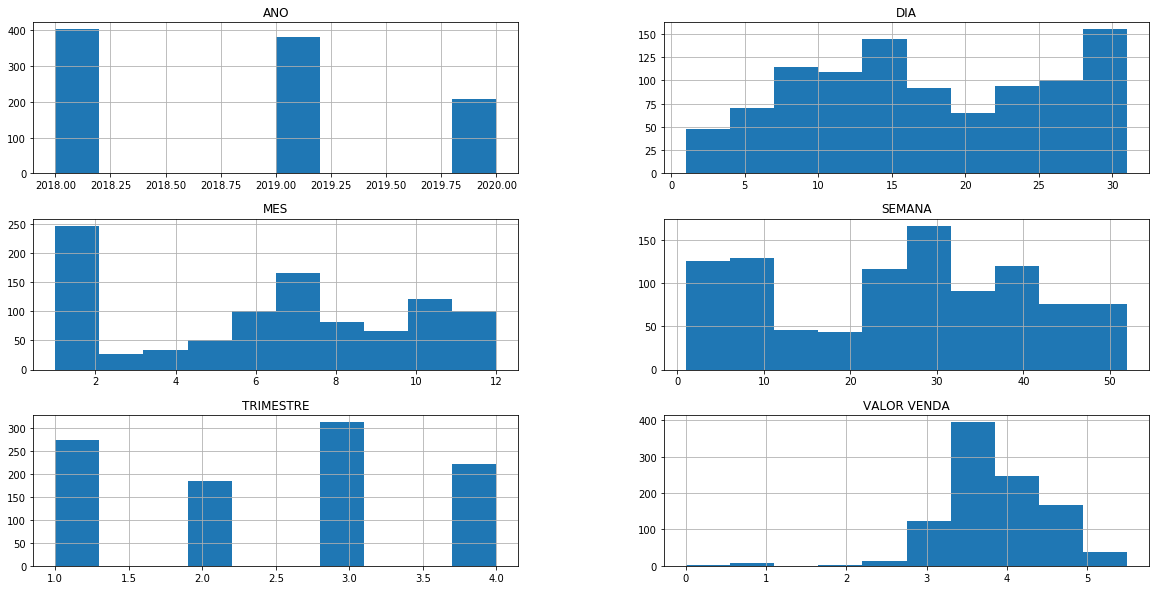

In [22]:
infopreco_df.hist(figsize=(20,10))

In [29]:
infopreco_df.to_csv('infopreco_dataframe_base')